In [10]:
import torch
print(torch.cuda.is_available())

True


In [11]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
# Set the object to None
large_object = None

# Call the garbage collector
import gc
gc.collect()

# Clear PyTorch cache
import torch
torch.cuda.empty_cache()

In [13]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


In [5]:
import tensorflow as tf

tf.keras.backend.clear_session()


In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
# import sys
# from PIL import Image
# sys.modules['Image'] = Image 

In [14]:
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

# Define directories
train_dir = r"\Users\ANUSHKA\Downloads\archive\Common_Indian_Plants/TRAIN"
val_dir = r"\Users\ANUSHKA\Downloads\archive\Common_Indian_Plants/VALID"
test_dir = r"\Users\ANUSHKA\Downloads\archive\Common_Indian_Plants/TEST"

# Define data generators for training and validation with augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Define batch size
batch_size = 8

# Create generators to load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(456, 456),  # EfficientNetB7 input size
    batch_size=batch_size,
    class_mode='sparse'  # Adjust class_mode based on your classification task
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(456, 456),  # EfficientNetB7 input size
    batch_size=batch_size,
    class_mode='sparse'  # Adjust class_mode based on your classification task
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(456, 456),  # EfficientNetB7 input size
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False  # Adjust class_mode based on your classification task
)

# Load pre-trained EfficientNetB7 model
efficient_net = EfficientNetB5(weights='imagenet', include_top=False, input_shape=(456, 456, 3))

# Freeze pre-trained layers
for layer in efficient_net.layers:
    layer.trainable = False

# Add custom dense layers for classification
x = GlobalAveragePooling2D()(efficient_net.output)
x = Dense(1024, activation='relu')(x)  # Reduce the number of units in the dense layer
x = Dropout(0.5)(x)
prediction = Dense(10, activation='softmax')(x)   # Adjust the number of output classes

# Create the model
model = Model(inputs=efficient_net.input, outputs=prediction)

# Compile the model
optimizer = Adam(lr=0.001)  # Initial learning rate
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)


Found 8418 images belonging to 10 classes.
Found 2173 images belonging to 10 classes.
Found 3634 images belonging to 10 classes.


In [15]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 456, 456, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 456, 456, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 456, 456, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

In [16]:
from PIL import Image

Epoch 1/50
1053/1053 [==============================] - 447s 412ms/step - loss: 0.3207 - accuracy: 0.8953 - val_loss: 0.1915 - val_accuracy: 0.9393 - lr: 0.0010
Epoch 2/50
1053/1053 [==============================] - 430s 408ms/step - loss: 0.1875 - accuracy: 0.9446 - val_loss: 0.0910 - val_accuracy: 0.9701 - lr: 0.0010
Epoch 3/50
1053/1053 [==============================] - 430s 408ms/step - loss: 0.1622 - accuracy: 0.9517 - val_loss: 0.0963 - val_accuracy: 0.9728 - lr: 0.0010
Epoch 4/50
1053/1053 [==============================] - 430s 409ms/step - loss: 0.1511 - accuracy: 0.9569 - val_loss: 0.1534 - val_accuracy: 0.9544 - lr: 0.0010
Epoch 5/50
1053/1053 [==============================] - 430s 408ms/step - loss: 0.1244 - accuracy: 0.9638 - val_loss: 0.1773 - val_accuracy: 0.9618 - lr: 0.0010
Epoch 6/50
1053/1053 [==============================] - 430s 408ms/step - loss: 0.0716 - accuracy: 0.9765 - val_loss: 0.0950 - val_accuracy: 0.9788 - lr: 2.0000e-04
Epoch 7/50
1053/1053 [========

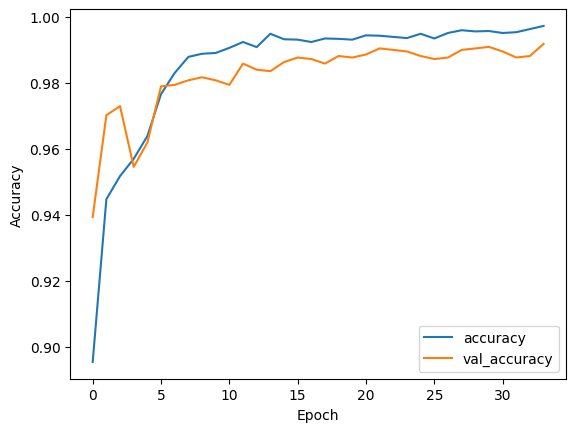

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,  # Adjust the number of epochs
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stop, reduce_lr]
)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('inceptionV1.png')
plt.show()



C:\Users\ANUSHKA\AppData\Local\Temp\ipykernel_1116\1248099273.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(test_generator, steps=test_steps, verbose=1)


454/454 [==============================] - 153s 337ms/step - loss: 0.0289 - accuracy: 0.9912
Test Loss: 0.02891981042921543
Test Accuracy: 0.9911942481994629


C:\Users\ANUSHKA\AppData\Local\Temp\ipykernel_1116\1248099273.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_steps, verbose=1)


454/454 [==============================] - 157s 335ms/step
Confusion Matrix:
[[409   0   1   0   0   0   0   0   0   0]
 [  0 291   0   0   0   0   0   0   0   0]
 [  0   0 401   0   0   4   1   0   0   0]
 [  0   0   0 396   0   0   0   0   0   0]
 [  0   0   1   0 306   0   0   0   0   8]
 [  0   0   0   0   0 385   0   0   0   0]
 [  0   0   0   1   0   0 374   0   0   2]
 [  0   0   0   0   0   0   0 262   0   0]
 [  0   0   0   0   2   0   0   0 426   2]
 [  1   0   0   0   5   0   4   0   0 352]]


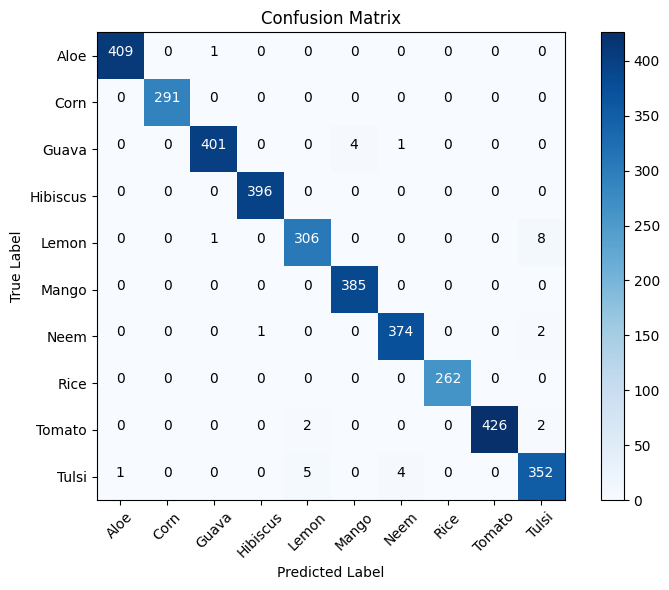

Classification Report:
              precision    recall  f1-score   support

        Aloe       1.00      1.00      1.00       410
        Corn       1.00      1.00      1.00       291
       Guava       1.00      0.99      0.99       406
    Hibiscus       1.00      1.00      1.00       396
       Lemon       0.98      0.97      0.97       315
       Mango       0.99      1.00      0.99       385
        Neem       0.99      0.99      0.99       377
        Rice       1.00      1.00      1.00       262
      Tomato       1.00      0.99      1.00       430
       Tulsi       0.97      0.97      0.97       362

    accuracy                           0.99      3634
   macro avg       0.99      0.99      0.99      3634
weighted avg       0.99      0.99      0.99      3634



In [18]:
# Testing the model
test_steps = test_generator.n / batch_size
test_loss, test_accuracy = model.evaluate_generator(test_generator, steps=test_steps, verbose=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Generating predictions for the test set
test_generator.reset()  # Reset generator before calling predict_generator
predictions = model.predict_generator(test_generator, steps=test_steps, verbose=1)
predicted_classes = predictions.argmax(axis=-1)

# Creating the confusion matrix
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Adding text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


In [19]:
#tf.keras.models.load_model('vgg.h5')
model.save("efficient.h5")

TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

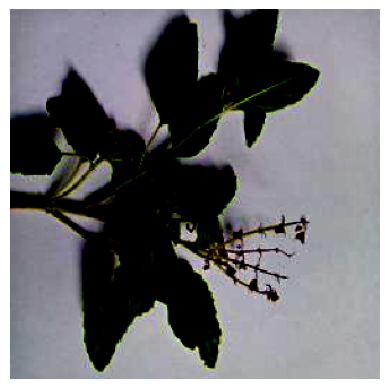

array([[[[0.4666667 , 0.45882356, 0.5058824 ],
         [0.47450984, 0.4666667 , 0.5137255 ],
         [0.47450984, 0.4666667 , 0.5137255 ],
         ...,
         [0.58431375, 0.5764706 , 0.6156863 ],
         [0.58431375, 0.5764706 , 0.6156863 ],
         [0.58431375, 0.5764706 , 0.6156863 ]],

        [[0.45882356, 0.45098042, 0.49803925],
         [0.4666667 , 0.45882356, 0.5058824 ],
         [0.4666667 , 0.45882356, 0.5058824 ],
         ...,
         [0.58431375, 0.5764706 , 0.6156863 ],
         [0.58431375, 0.5764706 , 0.6156863 ],
         [0.58431375, 0.5764706 , 0.6156863 ]],

        [[0.45098042, 0.4431373 , 0.4901961 ],
         [0.45882356, 0.45098042, 0.49803925],
         [0.4666667 , 0.45882356, 0.5058824 ],
         ...,
         [0.58431375, 0.5764706 , 0.6156863 ],
         [0.58431375, 0.5764706 , 0.6156863 ],
         [0.58431375, 0.5764706 , 0.6156863 ]],

        ...,

        [[0.4901961 , 0.5137255 , 0.5529412 ],
         [0.4901961 , 0.5137255 , 0.5529412 ]

In [13]:
def load_image(img_path, show=False):
        img = image.load_img(img_path, target_size=(299,299))
        img_tensor = np.expand_dims(img, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
        img_tensor = preprocess_input(img_tensor)
        
        if show:
            plt.imshow(img_tensor[0])
            plt.axis('off')
            plt.show()
        
        return img_tensor

load_image('/Users/ayushjain/Downloads/NEW_PLANT_DATASET/TRAIN/Tulsi/0065.jpg', True)